## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [14] : [EVALUATING TECHNIQUES] </div>

#### <div align="center"> Semester Ganjil 2023/2024 </div>

In [ ]:
import datetime
import uuid

# Fill in your name and NIM
myName = "Steven Indriano"
myNIM = "57217"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Steven Indriano
NIM: 		57217
Start: 		2023-12-06 04:03:45.099837
Device ID: 	734e3674-93ec-11ee-8773-0242ac1c000c



---

### Dataset yang dipakai:

1. [Nama dataset1] – sumber : [cantumkan link dataset]
2. [Nama dataset2] – sumber : [cantumkan link dataset]

### Hasil kerja

In [ ]:
# Your codes are here (replace the following codes)
import time
time.sleep(10)

In [ ]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
digits = datasets.load_digits()

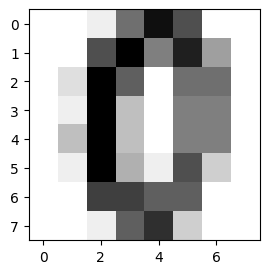

In [ ]:
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[10], cmap=plt.cm.gray_r)

In [ ]:
digits.images[10]

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

In [ ]:
digits.data[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

In [ ]:
digits.target[10]

0

In [ ]:
X_digits = digits.data
y_digits = digits.target

num_data_points = len(X_digits)
X_train = X_digits[:int(.7*num_data_points)]
y_train = y_digits[:int(.7*num_data_points)]
X_test = X_digits[:int(.7*num_data_points)]
y_test = y_digits[:int(.7*num_data_points)]

print(X_train.shape, X_test.shape)

(1257, 64) (1257, 64)


In [ ]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print('Logistic Regression mean Accuracy: %f' %logistic.score(X_test, y_test))

Logistic Regression mean Accuracy: 1.000000


In [ ]:
import numpy as p
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, data.feature_names)

(569, 30) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=2)
km.fit(X)

labels = km.labels_
centers=km.cluster_centers_
print(labels[:10])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 1 0 1 0 1 1 1]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
bc_pca = pca.fit_transform(X)

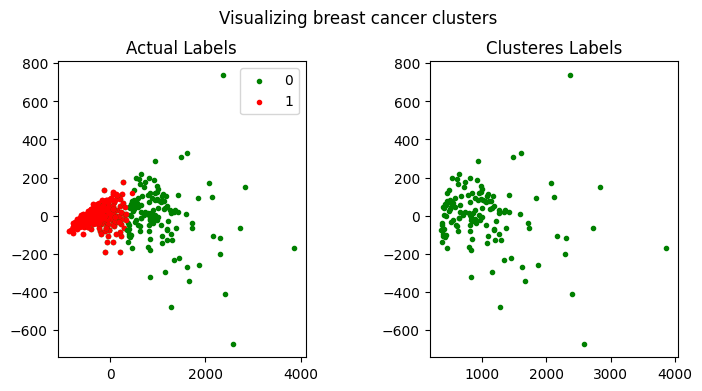

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Clusteres Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i, 0], bc_pca[i, 1], c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i, 0], bc_pca[i, 1], c='r', marker='.')

    if labels[i] == 0:
        c3 = ax2.scatter(bc_pca[i, 0], bc_pca[i, 1], c='g', marker='.')
    if labels[i] == 1:
        c4 = ax1.scatter(bc_pca[i, 0], bc_pca[i, 1], c='r', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax1.legend([c3, c4], ['0', '1'])

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(suppress= True)

Z=linkage(X, 'ward')
print(Z)

[[  287.           336.             3.81596727     2.        ]
 [  106.           420.             4.11664267     2.        ]
 [   55.           251.             4.93361024     2.        ]
 ...
 [ 1130.          1132.          6196.07482529    86.        ]
 [ 1131.          1133.          8368.99225244   483.        ]
 [ 1134.          1135.         18371.10293626   569.        ]]


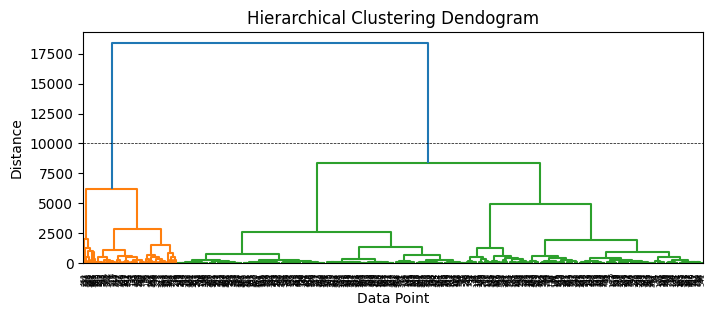

In [ ]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
dendrogram(Z)

plt.axhline(y=10000, c='k', ls='--', lw=0.5)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_dist = 10000
hc_labels = fcluster(Z, max_dist, criterion = 'distance')

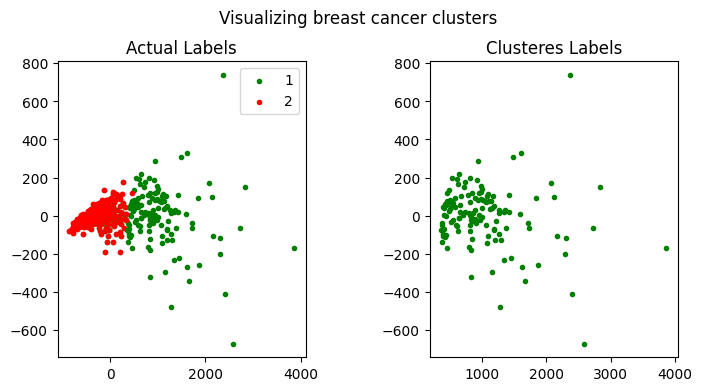

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Clusteres Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i, 0], bc_pca[i, 1], c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i, 0], bc_pca[i, 1], c='r', marker='.')

    if labels[i] == 0:
        c3 = ax2.scatter(bc_pca[i, 0], bc_pca[i, 1], c='g', marker='.')
    if labels[i] == 1:
        c4 = ax1.scatter(bc_pca[i, 0], bc_pca[i, 1], c='r', marker='.')

l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax1.legend([c3, c4], ['1', '2'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


In [ ]:
from sklearn import linear_model

logistic=linear_model.LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
import model_evaluation_utils as meu

y_pred = logistic.predict(X_test)
meu.display_confusion_matrix(true_labels=y_test, predicted_labels=y_pred, classes=[0, 1])

          Predicted:     
                   0    1
Actual: 0         59    4
        1          1  107


In [ ]:
possitive_class = 1
TP = 106
FP=4
TN=9
FN=2

In [ ]:
fw_acc = round(meu.metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_acc = round((TP + TN) / (TP + TN + FP + FN), 5)

print('Framework Accuracy: ', fw_acc)
print('Manually Computed Accuracy: ', mc_acc)

Framework Accuracy:  0.97076
Manually Computed Accuracy:  0.95041


In [ ]:
fw_acc = round(meu.metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_acc = round((TP) / (TP + FP), 5)

print('Framework Accuracy: ', fw_acc)
print('Manually Computed Accuracy: ', mc_acc)

Framework Accuracy:  0.97076
Manually Computed Accuracy:  0.96364


In [ ]:
fw_rec = round(meu.metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_rec = round((TP) / (TP + FP), 5)

print('Framework Accuracy: ', fw_rec)
print('Manually Computed Accuracy: ', mc_rec)

Framework Accuracy:  0.97076
Manually Computed Accuracy:  0.96364


In [ ]:
fw_f1 = round(meu.metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_f1 = round((2*mc_rec*mc_rec) / (mc_rec + mc_rec), 5)

print('Framework Accuracy: ', fw_f1)
print('Manually Computed Accuracy: ', mc_f1)

Framework Accuracy:  0.97076
Manually Computed Accuracy:  0.96364


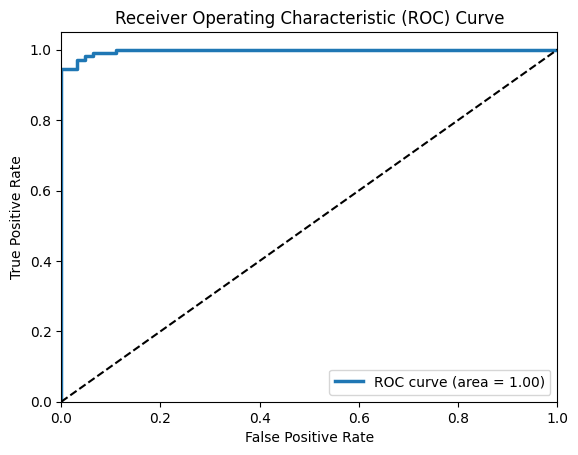

In [ ]:
meu.plot_model_roc_curve(clf=logistic, features=X_test, true_labels=y_test)

In [ ]:
km2 = KMeans(n_clusters=2, random_state=42).fit(X)
km2_labels = km2.labels_

km5 = KMeans(n_clusters=5, random_state=42).fit(X)
km5_labels = km5.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
km2_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km2_labels), 3)
km5_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km5_labels), 3)

print('Homogeneity, Completeness, V-meassure metrics for num clusters=2: ', km2_hcv)
print('Homogeneity, Completeness, V-meassure metrics for num clusters=5: ', km5_hcv)

Homogeneity, Completeness, V-meassure metrics for num clusters=2:  [0.422 0.517 0.465]
Homogeneity, Completeness, V-meassure metrics for num clusters=5:  [0.602 0.298 0.398]


In [ ]:
from sklearn import metrics

km2_silc = metrics.silhouette_score(X, km2_labels, metric='euclidean')
km5_silc = metrics.silhouette_score(X, km5_labels, metric='euclidean')

print('Silhouette Coefficient for num clusters=2: ', km2_silc)
print('Silhouette Coefficient for num clusters=5: ', km2_silc)

Silhouette Coefficient for num clusters=2:  0.6972646156059464
Silhouette Coefficient for num clusters=5:  0.6972646156059464


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
feature, target = make_regression(n_samples=100,
                                 n_features=3,
                                 n_informative=3,
                                 n_targets=1,
                                 noise=1,
                                 coef=False,
                                 random_state=1)

In [ ]:
ols = LinearRegression()

In [ ]:
cross_val_score(ols, feature, target, scoring='neg_mean_squared_error')

array([-0.78986135, -0.80181655, -1.57407742, -0.42401745, -0.63949642])

In [ ]:
cross_val_score(ols, feature, target, scoring='r2')

array([0.99994298, 0.99991772, 0.99985451, 0.9999636 , 0.99991436])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def_svc = SVC(random_state=42)
def_svc.fit(X_train, y_train)

def_y_pred = def_svc.predict(X_test)
print('Default Model Stats: ')
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=def_y_pred, classes=[0, 1])

Default Model Stats: 
Model Performance metrics:
------------------------------
Accuracy: 0.9357
Precision: 0.9416
Recall: 0.9357
F1 Score: 0.9342

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0         52   11
        1          0  108


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_parameters = {'kernel': ['linear', 'rbf'],
                  'gamma': [1e-3, 1e-4],
                  'C': [1, 10, 50, 100]}

print("# Tuning hyper-parameters for accuracy\n")
clf = GridSearchCV(SVC(random_state=42), grid_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("Grid scores for all the models based on CV: \n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))

print("\nBest parameters set found on development set: ", clf.best_params_)
print("Best model validation accuracy: ", clf.best_score_)

# Tuning hyper-parameters for accuracy

Grid scores for all the models based on CV: 

0.95218 (+/-0.06256) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.91193 (+/-0.04607) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.95218 (+/-0.06256) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.92459 (+/-0.02287) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.96228 (+/-0.04244) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.90187 (+/-0.04735) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.96228 (+/-0.04244) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.92959 (+/-0.03449) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95718 (+/-0.05923) for {'C': 50, 'gamma': 0.001, 'kernel': 'linear'}
0.90187 (+/-0.04735) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.95718 (+/-0.05923) for {'C': 50, 'gamma': 0.0001, 'kernel': 'linear'}
0.93462 (+/-0.02969) for {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95468 (+/-0.05703) for {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.9018

In [ ]:
gs_best = clf.best_estimator_
tuned_y_pred = gs_best.predict(X_test)

print('\n\nTuned Model Stats: ')
meu.display_model_performance_metrics(true_labels=y_test,
                                     predicted_labels=tuned_y_pred, classes=[0, 1])



Tuned Model Stats: 
Model Performance metrics:
------------------------------
Accuracy: 0.9708
Precision: 0.9709
Recall: 0.9708
F1 Score: 0.9708

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0         61    2
        1          3  105


In [ ]:
import scipy
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': scipy.stats.expon(scale=10),
             'gamma': scipy.stats.expon(scale=.1),
             'kernel': ['rbf', 'linear']}

random_search = RandomizedSearchCV(SVC(random_state=42), param_distributions=param_grid,
                                 n_iter=50, cv=5)

random_search.fit(X_train, y_train)

print("Best parameters set found on development set: ")
random_search.best_params_

Best parameters set found on development set: 


{'C': 16.349475954262452, 'gamma': 0.24319569795575433, 'kernel': 'linear'}

In [ ]:
rs_best = random_search.best_estimator_
rs_y_pred = rs_best.predict(X_test)
meu.get_metrics(true_labels=y_test, predicted_labels=rs_y_pred)

Accuracy: 0.9591
Precision: 0.9593
Recall: 0.9591
F1 Score: 0.9591


In [ ]:
 conda install -c conda-forge skater

ValueError: ignored

In [ ]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

interpreter = Interpretation(X_test, feature_names=data.feature_names)
model = InMemoryModel(logistic.predict_prob, examples=X_train,
                     target_names=logistic.classes_)

ModuleNotFoundError: ignored

In [ ]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
exp = LimeTabularExplainer(X_train, feature_names=data.feature_names,
                          discrete_continuous=True, class_names=['0', '1'])

In [ ]:
exp.explain_instance(X_test[0], logistic.predict_proba).show_in_notebook()

In [ ]:
exp.explain_instance(X_test[1], logistic.predict_proba).show_in_notebook()

In [ ]:
from sklearn.externals import joblib
joblib.dump(logistic, 'lr_model.pkl')

In [ ]:
lr=joblib.load('lr_model.pkl')
lr

In [ ]:
print(lr.predict(X_test[10:11]), y_test[10:11])

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Simpulan perbandingan dataset
    - Hasil akurasi yang diberikan (jika ada dalam modul)
    - Hasil perbandingan akurasi antara algoritma (jika ada dalam modul)
    - Hasil pemikiran dan observasi akhir dari kerja menurut mahasiswa.

In [ ]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Steven Indriano
NIM: 	57217
Time-stamp:	2023-12-06 04:32:13.979176


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [ ]:
!jupyter nbconvert --to html "./IF540L_kelas_C_laporan_M14_57217_Steven Indriano.ipynb" --output-dir="./"

### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#